In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker

In [3]:
calls_by_boro=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\seasonal_by_tract.csv')

In [4]:
calls_by_boro['complaint_type'].unique()

array(['Street Light Condition', 'Water Quality', 'Plumbing', 'Electrical',
       'Dirty Conditions', 'Sewer', 'Snow',
       'General Construction/Plumbing', 'Building/Use', 'Water System',
       'Water Conservation', 'Street Condition', 'Blocked Driveway',
       'ELECTRIC', 'Sanitation Condition', 'PLUMBING', 'PAINT - PLASTER',
       'GENERAL CONSTRUCTION', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Noise', 'NONCONST', 'HEATING',
       'Non-Residential Heat', 'Root/Sewer/Sidewalk Condition',
       'Noise - Residential', 'Illegal Parking', 'Standing Water',
       'HEAT/HOT WATER', 'WATER LEAK'], dtype=object)

In [5]:
calls=pd.melt(calls_by_boro,id_vars=['complaint_type','created_date'],var_name=['boro_ct201'])

In [6]:
calls['boro_ct201']=calls['boro_ct201'].str[:7]

In [7]:
cb=calls.groupby(['created_date','boro_ct201']).agg({'value':'median'})['value']
#group it by created_date, boro_ct201, and for the value column we take the median

In [8]:
cb.head()

created_date  boro_ct201
2003-12-01    1000100       NaN
              1000201       NaN
              1000202       1.5
              1000500       NaN
              1000600       1.0
Name: value, dtype: float64

In [9]:
median_array=cb.unstack().mean(axis=0)
#taking the mean of the med

In [10]:
heating=calls[calls['complaint_type'].str.match('HEATING')]

In [11]:
heating.head()

complaint_type created_date boro_ct201  value
32         HEATING   2004-03-01    1000100    NaN
55         HEATING   2004-06-01    1000100    NaN
77         HEATING   2004-09-01    1000100    NaN
94         HEATING   2004-12-01    1000100    NaN
121        HEATING   2005-03-01    1000100    NaN

In [12]:
H=heating.pivot_table(index='created_date',columns='boro_ct201')['value']

In [13]:
H_tracts=dict()
for s in H:
    H_tracts[s]=H[s]/median_array[s]
hdf=pd.DataFrame(H_tracts)
hdf.head()

1000201    1000202    1000600   1000700    1000800   1000900  \
created_date                                                                 
2004-03-01        0.5   0.283505   3.484163       NaN   4.638554       NaN   
2004-06-01        0.5   0.567010   0.165913  0.222222   2.484940       NaN   
2004-09-01        0.5   1.984536  11.282051  0.222222  11.927711  0.467091   
2004-12-01        5.0  10.206186  23.725490  4.000000  22.198795  0.934183   
2005-03-01        NaN   0.850515   7.963801  0.222222   5.963855       NaN   

                1001001    1001200   1001300   1001401    ...      5027706  \
created_date                                              ...                
2004-03-01          NaN        NaN  0.434783       NaN    ...          NaN   
2004-06-01          NaN   0.940171  0.217391  2.018692    ...          NaN   
2004-09-01     0.524272   0.940171  3.478261  2.018692    ...     0.650888   
2004-12-01    11.009709  10.655271  5.217391  6.056075    ...     1.301775   
2005-03-01     2.621359   1.566952  0.217391  2.523364    ...     0.325444   

              5027900   5029102   5029103   5029104  5030301   5030302  \
created_date                                                             
2004-03-01        NaN       NaN       NaN  0.162722     0.22  0.185185   
2004-06-01        NaN       NaN       NaN       NaN      NaN  0.185185   
2004-09-01        NaN       NaN  0.685358  0.650888     1.32  0.185185   
2004-12-01        NaN  0.205224  0.514019  0.162722     1.98  0.740741   
2005-03-01        NaN       NaN       NaN       NaN     1.10  0.185185   

               5031901    5031902   5032300  
created_date                                 
2004-03-01         NaN   0.579710       NaN  
2004-06-01         NaN   2.753623       NaN  
2004-09-01    0.340694   9.130435  0.683230  
2004-12-01    0.340694  58.985507  0.341615  
2005-03-01         NaN   7.971014       NaN  

[5 rows x 2116 columns]

In [14]:
L=[]
for i in hdf.index:
    L.append(i)

In [15]:
K=dict()
for i in L[1::5]:
    K[i]=hdf.loc[i]

In [16]:
test=pd.DataFrame(K)
test.index.names=['boro_ct201']

test.head()

2004-06-01  2005-09-01  2006-12-01  2008-03-01  2009-06-01  \
boro_ct201                                                               
1000201       0.500000    5.000000    6.000000    0.500000         NaN   
1000202       0.567010    1.701031    9.922680    7.371134         NaN   
1000600       0.165913    8.295626   13.107089    3.981900    0.663650   
1000700       0.222222         NaN    0.222222         NaN    0.444444   
1000800       2.484940   12.921687   13.915663    6.626506    0.331325   

            2010-09-01  2011-12-01  2013-03-01  
boro_ct201                                      
1000201       1.000000    3.000000   41.000000  
1000202       1.134021    2.268041         NaN  
1000600       8.129713    6.636501    4.479638  
1000700       0.666667    0.222222    0.444444  
1000800       7.123494   17.725904    1.325301

In [17]:
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}#tells how the earth exist 
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [18]:
tracts=gdf[['boro_ct201','geometry']].merge(test,
                   left_on='boro_ct201',right_index=True)

In [19]:
tracts.head()

boro_ct201                                           geometry  2004-06-01  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...    0.207940   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...    1.325301   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...    0.303030   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...         NaN   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...    0.256410   

   2005-09-01  2006-12-01  2008-03-01  2009-06-01  2010-09-01  2011-12-01  \
0    4.158790    5.822306    2.495274    0.207940    3.327032    2.911153   
1    7.024096   10.734940    6.096386    1.325301    4.108434    4.240964   
2    1.515152    5.454545    0.909091         NaN    3.030303    6.363636   
3         NaN    0.576000         NaN         NaN         NaN         NaN   
4    2.564103    2.820513    1.538462         NaN    1.538462    0.256410   

   2013-03-01  
0    8.317580  
1    3.843373  
2    0.606061  
3         NaN  
4    0.256410

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


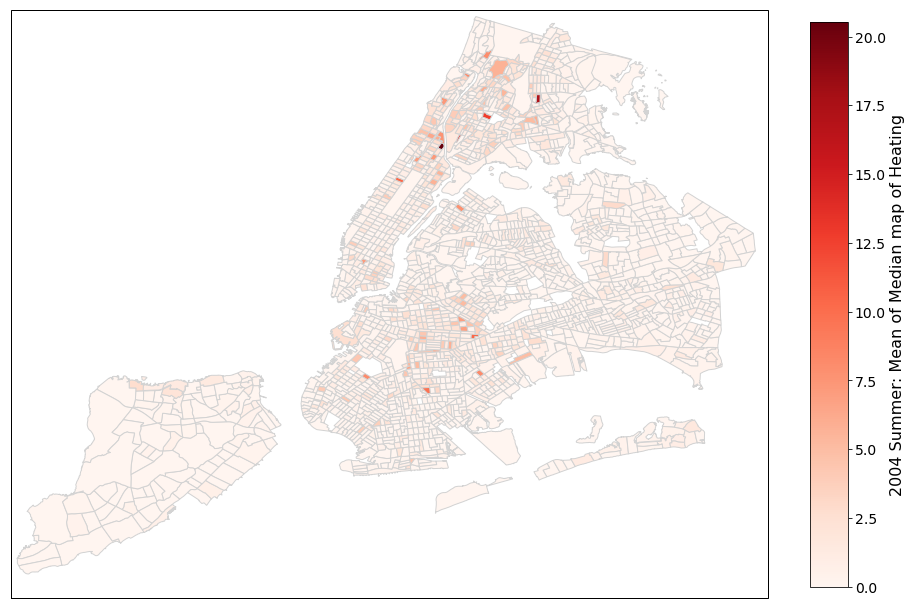

In [25]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2004-06-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2004-06-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='lightgrey')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2004 Summer: Mean of Median map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


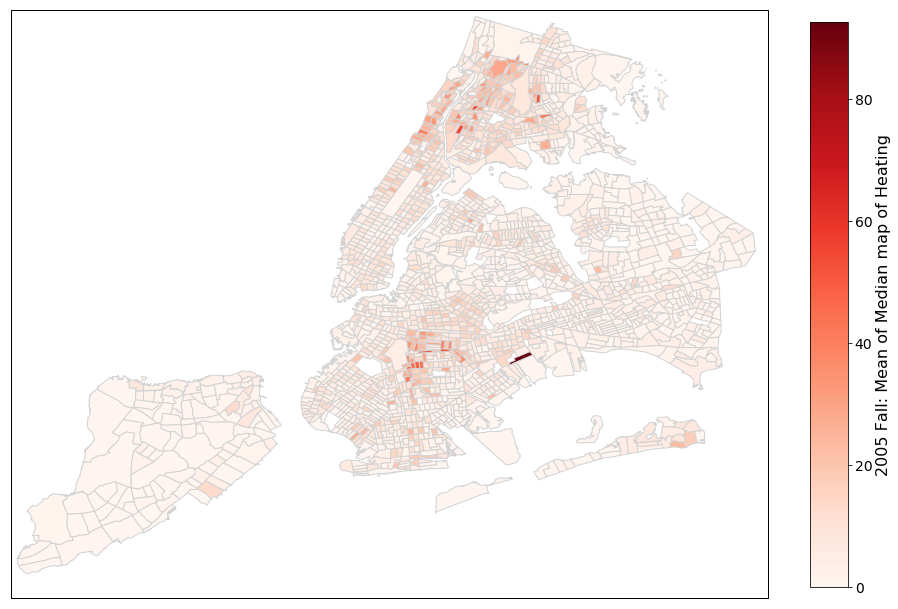

In [26]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2005-09-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2005-09-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='lightgrey')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2005 Fall: Mean of Median map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


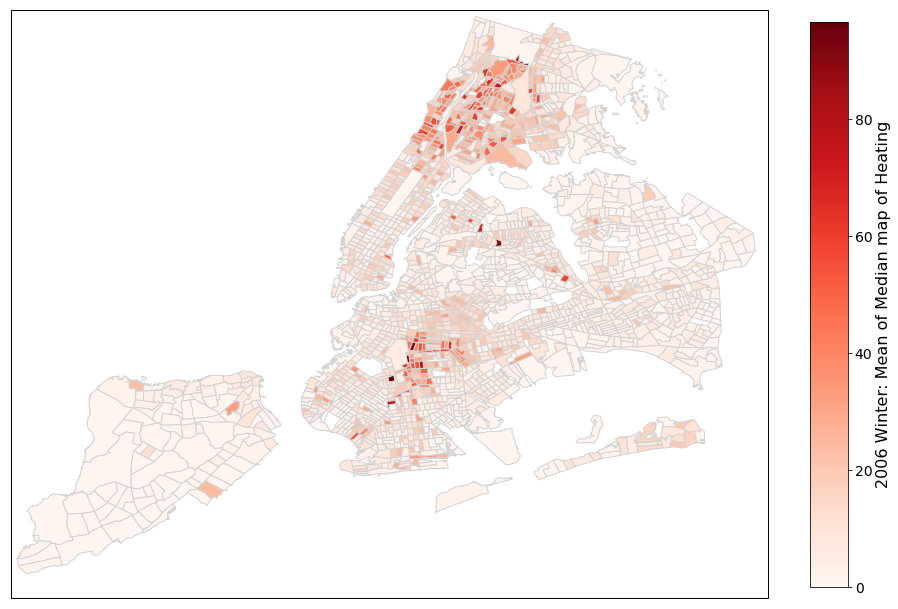

In [27]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2006-12-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2006-12-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='lightgrey')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2006 Winter: Mean of Median map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


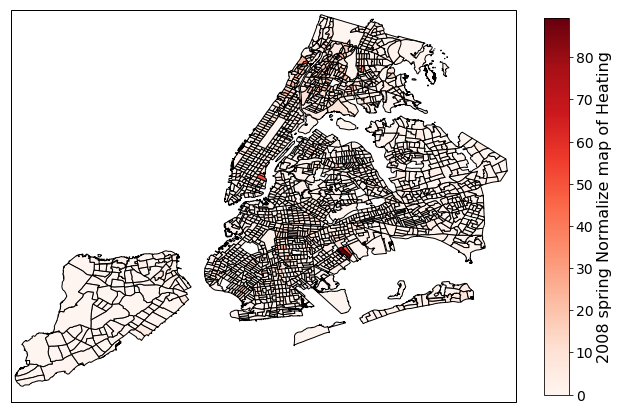

In [33]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2008-03-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2008-03-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2008 spring Normalize map of Heating" , fontsize=16)

In [28]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2009-06-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2009-06-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='lightgrey')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2009 Fall: Mean of Median map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


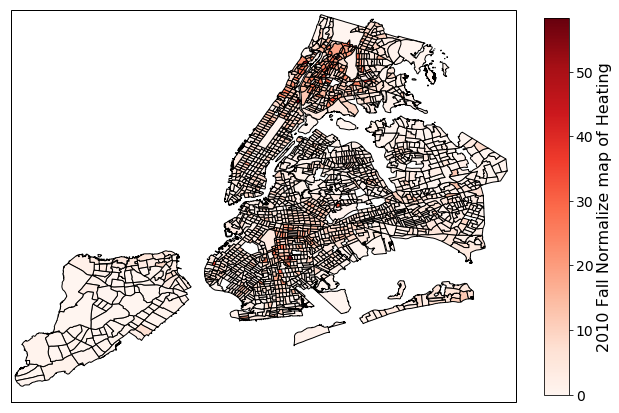

In [35]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2010-09-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2010-09-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2010 Fall Normalize map of Heating" , fontsize=16)

In [36]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2011-12-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2011-12-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2011 Winter Normalize map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [37]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2013-03-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2013-03-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2013 Spring Normalize map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
